# Final Training with Validation Accuracy Tracking



In [1]:
#%% 1. Környezet és adatok betöltése
import sys, os
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# gyökérkönyvtár hozzáadása
sys.path.append(os.path.abspath(".."))
from complex_mlp.model import ComplexMLP

# adat betöltése
data = np.load("../data/processed/dataset_preProcessed.npz")
X = data["images"].reshape(len(data["images"]), -1) / 255.0
y = data["labels"]

# train/val split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

input_dim = X_tr.shape[1]
n_classes = len(np.unique(y_tr))

# modell-konstansok
layer_sizes = [input_dim, 512, n_classes]
activations = ["tanh", "softmax"]
loss_fn      = "mse"
optimizer    = "adam"
opt_kwargs   = {"lr": 5e-4, "beta1":0.9, "beta2":0.999, "eps":1e-8}
batch_size   = 64
epochs       = 50

# one-hot a MSE-hez
y_tr_hot  = np.eye(n_classes)[y_tr]
y_val_hot = np.eye(n_classes)[y_val]


In [2]:
#%% 2. Tréning loop val_accuracy monitoringgal
train_losses   = []
val_accuracies = []
epoch_times    = []

model = ComplexMLP(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_fn,
    optimizer=optimizer,
    optimizer_kwargs=opt_kwargs,
    early_stopping=False
)

for ep in range(1, epochs+1):
    t0 = time.time()
    # shuffle
    idx = np.random.permutation(len(X_tr))
    Xs, ys = X_tr[idx], y_tr_hot[idx]
    
    # train batch-ek
    tr_loss_sum = 0.0
    for i in range(0, len(Xs), batch_size):
        xb = Xs[i:i+batch_size]
        yb = ys[i:i+batch_size]
        preds = model.forward(xb)
        loss  = model.loss_fn.forward(preds, yb)
        grad  = model.loss_fn.backward()
        model.backward(grad)
        tr_loss_sum += loss * len(xb)
    avg_tr_loss = tr_loss_sum / len(X_tr)
    
    # validation accuracy
    y_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    
    elapsed = time.time() - t0
    
    train_losses.append(avg_tr_loss)
    val_accuracies.append(val_acc)
    epoch_times.append(elapsed)
    
    print(f"Epoch {ep}/{epochs}  train_loss={avg_tr_loss:.4f}  "
          f"val_acc={val_acc:.4f}  time={elapsed:.2f}s")


Epoch 1/50  train_loss=0.0175  val_acc=0.9169  time=13.20s
Epoch 2/50  train_loss=0.0130  val_acc=0.9262  time=12.67s
Epoch 3/50  train_loss=0.0110  val_acc=0.9321  time=13.93s
Epoch 4/50  train_loss=0.0099  val_acc=0.9373  time=12.21s
Epoch 5/50  train_loss=0.0092  val_acc=0.9402  time=12.81s
Epoch 6/50  train_loss=0.0088  val_acc=0.9422  time=13.67s
Epoch 7/50  train_loss=0.0080  val_acc=0.9405  time=13.12s
Epoch 8/50  train_loss=0.0077  val_acc=0.9445  time=12.61s
Epoch 9/50  train_loss=0.0074  val_acc=0.9506  time=13.85s
Epoch 10/50  train_loss=0.0068  val_acc=0.9473  time=12.64s
Epoch 11/50  train_loss=0.0065  val_acc=0.9376  time=12.67s
Epoch 12/50  train_loss=0.0062  val_acc=0.9508  time=13.38s
Epoch 13/50  train_loss=0.0059  val_acc=0.9535  time=12.34s
Epoch 14/50  train_loss=0.0057  val_acc=0.9552  time=13.33s
Epoch 15/50  train_loss=0.0054  val_acc=0.9565  time=13.25s
Epoch 16/50  train_loss=0.0050  val_acc=0.9550  time=13.55s
Epoch 17/50  train_loss=0.0049  val_acc=0.9553  t

In [3]:
#%% 3. Eredmények DataFrame-ben
df = pd.DataFrame({
    "epoch":        np.arange(1, epochs+1),
    "train_loss":   train_losses,
    "val_accuracy": val_accuracies,
    "epoch_time":   epoch_times
})
df


,epoch,train_loss,val_accuracy,epoch_time
0,1,0.017472,0.916925,13.196999
1,2,0.013023,0.926156,12.666851
2,3,0.010996,0.932137,13.932213
3,4,0.009945,0.937306,12.214551
4,5,0.009220,0.940186,12.809135
5,6,0.008810,0.942180,13.669470
6,7,0.008012,0.940481,13.123519
7,8,0.007692,0.944543,12.611081
8,9,0.007447,0.950598,13.850196
9,10,0.006803,0.947275,12.638353


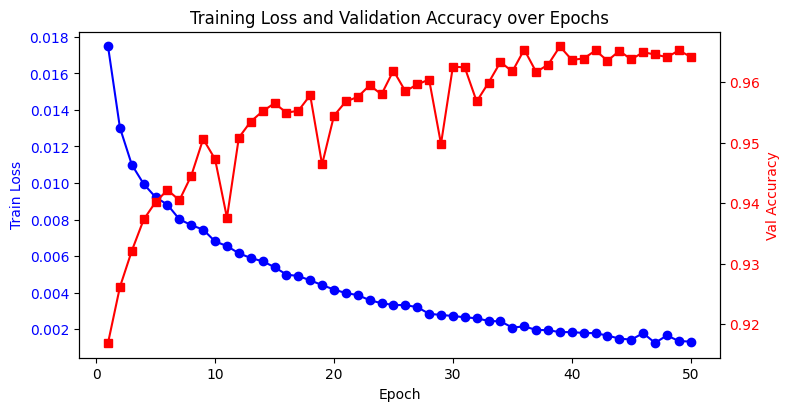

In [4]:
#%% 4. Görbe: Train Loss & Validation Accuracy egy grafikonon
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(df["epoch"], df["train_loss"], 'b-o', label="Train Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Train Loss", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df["epoch"], df["val_accuracy"], 'r-s', label="Val Accuracy")
ax2.set_ylabel("Val Accuracy", color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title("Training Loss and Validation Accuracy over Epochs")
plt.show()
